Text(0.5, 1.0, 'Sin Cos Plot')

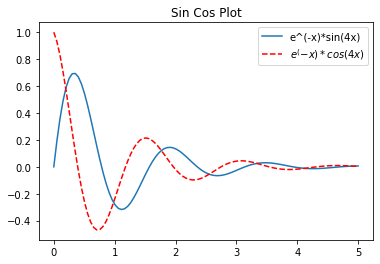

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
# create plot of e^(-x)sin(4x) and e^(-x)cos(4x) from 0 to 5
x = np.linspace(0,5,100) # 100 points between 0 and 5, equally spaced
#print(x)
#help(np.linspace) prints help
y = np.sin(4*x)*np.exp(-x)
#print(y)
z = np.cos(4*x)*np.exp(-x)
#print(z)
plt.figure() # top level container for all elements
plt.plot(x,y, label = "e^(-x)*sin(4x)")
plt.plot(x,z,"r--", label="$e^(-x)*cos(4x)$") # r-- makes a red dash line
#$ makes it into latex form"
plt.legend() #label and legend gives it the label
#linewidth adjusts width of line of plt
#savefig saves figure of plt
plt.title("Sin Cos Plot") #writes title




In [2]:
#pass by object reference
def append_one(li):
    li.append(1)
x = [0]
append_one(x)
print(x)

def append_array(current_list,new_element):
    current_list.append(new_element)
a = []
append_array(a,[1,0,1,0])
print(a)
append_array(a,[1,1,0,0])
print(a)

listA = [0]
listB = listA
listB.append(1)
print(listA)


[0, 1]
[[1, 0, 1, 0]]
[[1, 0, 1, 0], [1, 1, 0, 0]]
[0, 1]


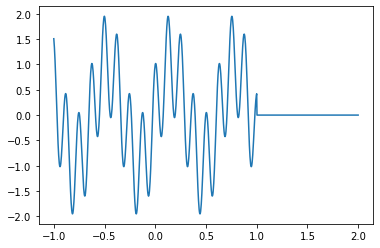

In [3]:
#Alt Shift A insert new cell Above
#Alt Shift B insert new cell Below
#imports numpy (math functions)
import numpy as np

#imports matplotlib (plotting library)
import matplotlib.pyplot as plt

#define function
def h(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y = (np.cos(50*x) + np.sin(10*x))
    return y

#takes sequence of objects and puts them into an array
hv = np.vectorize(h)


#creates evenly spaced intervals (first number, last number, amount of numbers)
X = np.linspace(-1,2,num=1000)


plt.plot(X,hv(X))



-0.12500000000000003


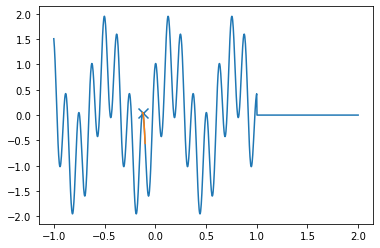

In [4]:
def simple_greedy_search(func, start, n):
    x = start   # start out with some random starting value
    history = []
    for i in range (n):
        history.append(x)   #keep track of steps
        u = 0.001  #np.random.rand()  , size of step
        xleft, xright = x-u, x+u    #look around neighbourhood
        yleft, yright = func(xleft), func(xright)
        if yleft > yright:  #if moving to left is greater
            x=xleft #accept left candidate
        elif yleft > yright:   #else
            x=xright    #accept right candidate
    return x,history
        

x0,history = simple_greedy_search(hv,start=-0.1,n=100)
#do this number of times until reach maxima/minima

plt.plot (X,hv(X))

#x, y are data positions, s is marker size, marker is instance of class or text shorthand
plt.scatter(x0,h(x0),marker='x',s=100)
plt.plot(history,hv(history))
print (x0)



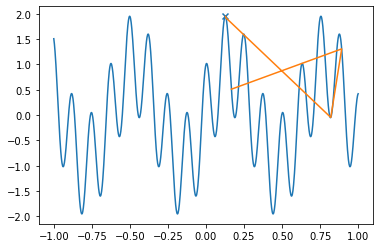

In [5]:
def SA(search_space,func,T):
    scale = np.sqrt(T)
    #start=-0.23
    start = np.random.choice(search_space)  #get random starting value
    x = start*1
    cur = func(x)
    history = [x]
    for i in range (1000):  #for a set of iterations
        prop = x + np.random.normal()*scale #get a proposal
        #calculate probability of accepting that proposal
        if np.log(np.random.rand())*T>(func(prop)-cur) or prop>1 or prop<0:
            prop=x
        x=prop
        cur=func(x) #either accept or reject it based on the probability
        T=0.9*T #reduce temperature by 10% each iteration
        history.append(x)
    return x,history

X = np.linspace(-1,1,num=1000)
x1,history = SA(X,h,T=4)

#print(x1.__sizeof__())
#print(history.__sizeof__())

plt.plot(X,hv(X))
plt.scatter(x1,hv(x1),marker='x')
plt.plot(history,hv(history))

        
        


Flag: Best solution is
[1 0 1 0]
Flag: History is 
[array([0, 0, 1, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 0, 1, 0]), array([1, 0, 1, 0]), array([1, 0, 1, 0]), array([1, 0, 1, 0]), array([1, 0, 1, 0]), array([1, 0, 1, 0]), array([0, 0, 1, 0]), array([0, 0, 0, 0])]
Flag: Objective History is
[5, 0, 1, 6, 6, 6, 6, 6, 6, 5, 0]


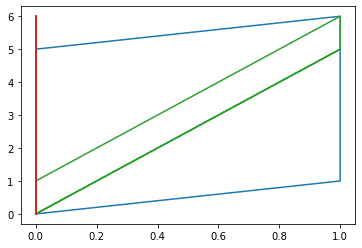

In [12]:

import random
import copy
import matplotlib.pyplot as plt
import numpy as np

def SA_knapsack(T): 

    current_solution = knapsack_greedy(8,[2,3,4,5],[1,2,5,6],4)
    history = []
    objective_history = []
    
    append_element(history,current_solution)
    
    best_objective = float ("-inf")
    best_solution = None
    current_objective = objective_function(current_solution,[2,3,4,5],[1,2,5,6],8)
    append_element(objective_history,current_objective)
    
    for i in range (10):
        if current_objective > best_objective:
            best_objective = current_objective
            best_solution = current_solution
            
        new_solution = neighbour(current_solution)
        objective_new_solution = objective_function(new_solution,[2,3,4,5],[1,2,5,6],8)
        diff = objective_new_solution-current_objective
        
        if np.exp(diff/T) > np.random.rand():
            current_objective = objective_function(new_solution,[2,3,4,5],[1,2,5,6],8)
            current_solution= new_solution
        T = 0.9*T
        append_element(objective_history,current_objective)
        append_element(history,current_solution)
        
    print("Flag: Best solution is")
    print(best_solution)
    print("Flag: History is ")
    print(history)
    print("Flag: Objective History is")
    print(objective_history)
 
    return best_solution,history,objective_history


def append_element(current_list,new_element):
    current_list.append(new_element)
    
def objective_function(solution_array,weight_array,values_array,knapsack_capacity_weight):
    resultant_total_value = 0
    resultant_total_weight = 0
    
    for i in range(len(solution_array)):
        add_weight = solution_array[i] * weight_array[i]
        resultant_total_weight += add_weight
        
        add_value = solution_array[i] * values_array[i]
        resultant_total_value += add_value
        
        if resultant_total_weight > knapsack_capacity_weight:
            return float ("-inf")
        
    return resultant_total_value


def neighbour(current_array):
    solution_array = copy.deepcopy(current_array)
    solution_array_size = len(solution_array)
    
    formula_selected = random.randint(1,2)
    if solution_array_size == 1:
        formula_selected = 1
    if solution_array_size == 0:
        formula_selected = 0
    
    if formula_selected == 1:
        index_selected = random.randint(0,solution_array_size-1)
        solution_array[index_selected] = boolean_flip(solution_array[index_selected])
    elif formula_selected == 2:
        index_selected = random.randint(0,solution_array_size-1)
        if index_selected == solution_array_size-1:
            neighbour_index_selected = index_selected - 1
        else:
            neighbour_index_selected = index_selected + 1
        solution_array[index_selected] = boolean_flip(solution_array[index_selected])
        solution_array[neighbour_index_selected] = boolean_flip(neighbour_index_selected)
   
    return solution_array
        

def boolean_flip(number):
    new_number = -1
    if number == 0:
        new_number = 1
    else:
        new_number = 0
    return new_number
 
def knapsack_greedy(knapsack_weight_capacity,weight_array,values_array,amount_of_objects):
    value_per_weight_array = np.empty(shape = amount_of_objects)
    objects_chosen_array = np.zeros(shape = amount_of_objects,dtype= int)
    total_weight = 0
    for i in range(amount_of_objects):
        value_per_weight = values_array[i] / weight_array[i]
        value_per_weight_array[i] = value_per_weight
        
    while total_weight <= knapsack_weight_capacity :
        max_vpw_index = np.argmax(value_per_weight_array)
        objects_chosen_array[max_vpw_index] = 1
        total_weight = total_weight + weight_array[max_vpw_index]
        
        if total_weight > knapsack_weight_capacity:
            objects_chosen_array[max_vpw_index] = 0
        else:
            value_per_weight_array[max_vpw_index] = -1
            
    return objects_chosen_array


sol,hist,obj_hist = SA_knapsack(T = 10)
plt.plot(hist,obj_hist)





In [7]:
import numpy as np
def knapsack_dynamic_programming(total_weight, weight_array, value_array, amount_of_objects):
    
    table = np.empty(shape=(amount_of_objects+1,total_weight+1),dtype=int)
    print("Flag: Table is")
    print(table)      
    
    print("Flag: Total weight is ")
    print (total_weight)
    print("Flag: Weight array is ")
    print(weight_array)
    print("Flag: Value array is ")
    print(value_array)
    print("Flag: Amount of Objects is ")
    print(amount_of_objects)
    
    weight_array.insert(0,0)
    print("Flag: New weight array is ")
    print(weight_array)

    value_array.insert(0,0)
    print("Flag: New value array is")
    print(value_array)

    for i in range(amount_of_objects+1):
        for w in range(total_weight+1):
            if i == 0 or w == 0:
                table[i][w] = 0
            elif weight_array[i] <= w:
                table[i][w] = max(table[i-1][w],
                    table[i-1][w-weight_array[i]]+value_array[i])
            else:
                table[i][w] = table[i-1][w]
    
    print("Flag: Tabular form from dynamic programming is")
    print(table)
    
    a = amount_of_objects
    b = total_weight
    objects_chosen_array = np.empty(shape=amount_of_objects,dtype=int)
    print(objects_chosen_array)
  
    while a>0:
        if table[a][b] == table[a-1][b]:    
            #object not included
            objects_chosen_array[a-1] = 0
            print("Flag:",a," is 0")
            #print(a)
            #print(" is 0")
            a-=1
        else:
            #object included
            objects_chosen_array[a-1] = 1
            print("Flag:",a," is 1")
            b-=weight_array[a]
            a-=1
    print("Flag: Objects chosen array is")
    print(objects_chosen_array)
    
    resultant_total_value = 0
    resultant_total_weight = 0
    for i in objects_chosen_array:
        add_weight = objects_chosen_array[i]*weight_array[i]
        resultant_total_weight += add_weight
        add_value = objects_chosen_array[i]*weight_array[i]
        resultant_total_value += add_value
    
    return objects_chosen_array,resultant_total_value,resultant_total_weight

knapsack_dynamic_programming(8,[2,3,4,5],[1,2,5,6],4)



Flag: Table is
[[ 1577065728   436478784   277221639   127932957 -1995399148    10486285
    126619009   471277220   469961217]
 [  101714432    33296414  1410773067  1410641995    12146779   952172304
    263211865    12146772   943718416]
 [ -321600423   837731344  -454815744  -435098380  -989982482   303164944
    554905657  1041309973     3289857]
 [  553653269   891758114   842203422   640955702   117842467   -48692259
    743976096   -31194630  1592786644]
 [-1067816765  -892686997  1419858349   -22358779   -32567406   -17700114
   -887086859 -1665781711   639940252]]
Flag: Total weight is 
8
Flag: Weight array is 
[2, 3, 4, 5]
Flag: Value array is 
[1, 2, 5, 6]
Flag: Amount of Objects is 
4
Flag: New weight array is 
[0, 2, 3, 4, 5]
Flag: New value array is
[0, 1, 2, 5, 6]
Flag: Tabular form from dynamic programming is
[[0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1]
 [0 0 1 2 2 3 3 3 3]
 [0 0 1 2 5 5 6 7 7]
 [0 0 1 2 5 6 6 7 8]]
[         0 1075314688          0 1074790400]
Flag: 4  i

(array([0, 1, 0, 1]), 4, 4)